# Customer Churn Prediction Project

In [15]:
#  Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc)

In [16]:
# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


In [17]:
# Step 3: Data Cleaning
df.replace(" ",np.nan, inplace=True)
df.dropna(inplace=True)

In [18]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],
errors='coerce')
df.dropna(inplace=True)

In [19]:
# Step 4 : Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
 if col != 'customerID':
    df[col] = le.fit_transform(df[col])
df.drop('customerID',axis=1,inplace=True)

In [20]:
# Step 5: Split data
X = df.drop('Churn', axis=1)
y = df['Churn']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
# Step 6 : Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Step 7 : Train Models
models = {"Logistic Regression":LogisticRegression(max_iter=1000),
          "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
          "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

for name, model in models.items():
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", 
accuracy_score(y_test, preds))
    print("ROC-AUC:",
roc_auc_score(y_test, preds))
    print(classification_report(y_test, preds))
    print("\n")


=== Logistic Regression ===
Accuracy: 0.7853589196872779
ROC-AUC: 0.6926311402850324
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



=== Random Forest ===
Accuracy: 0.7903340440653873
ROC-AUC: 0.6917549735726376
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407





c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Accuracy: 0.7640369580668088
ROC-AUC: 0.6755517132488831
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407





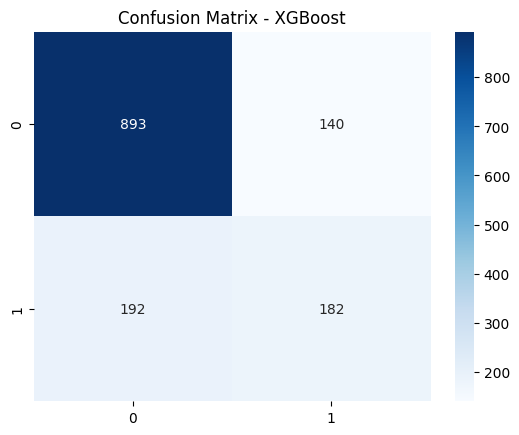

In [25]:
# Step 8 : Confusion matrix for Best Model
best_model = models["XGBoost"]
preds = best_model.predict(X_test)

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()